<a href="https://colab.research.google.com/github/NguyenHan243/ANN/blob/main/cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from keras.datasets import cifar100
(x_train,y_train),(x_test,y_test)=cifar100.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
x_train=x_train.reshape(50000,32*32*3)
x_train=x_train.astype('float32')/255
x_test=x_test.reshape(10000,32*32*3)
x_test=x_test.astype('float32')/255
from keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
model=Sequential()
model.add(Dense(1024,activation='relu',input_shape=(32*32,)))
model.add(Dropout(0.2))
model.add(Dense(526,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100,activation='softmax'))

In [17]:
import keras
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.00001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()
history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test))
test_loss,test_acc=model.evaluate(x_test,y_test)
print(f'Test Accuracy:{test_acc}')

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 1024)                │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 526)                 │         539,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 526)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │         134,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 100)                 │          25,700 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,846,514 (14.67 MB)

 Trainable params: 3,846,514 (14.67 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 121s 65ms/step - accuracy: 0.0147 - loss: 4.6305 - val_accuracy: 0.0419 - val_loss: 4.4862
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 64ms/step - accuracy: 0.0333 - loss: 4.4930 - val_accuracy: 0.0678 - val_loss: 4.3294
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 63ms/step - accuracy: 0.0482 - loss: 4.3706 - val_accuracy: 0.0765 - val_loss: 4.2023
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 64ms/step - accuracy: 0.0573 - loss: 4.2703 - val_accuracy: 0.0898 - val_loss: 4.1217
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 61ms/step - accuracy: 0.0647 - loss: 4.2059 - val_accuracy: 0.1028 - val_loss: 4.0489
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 60ms/step - accuracy: 0.0749 - loss: 4.1415 - val_accuracy: 0.1117 - val_loss: 3.9944
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 61ms/step - accuracy: 0.0829 - loss: 4.0970 - val_accuracy: 0.1196 - val_loss: 3.9445
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 64ms/step - accuracy: 0.0862 - loss: 4.0535 -

In [21]:
from keras.utils import load_img
from keras.utils import img_to_array
import matplotlib.pyplot as plt
import numpy as np
import cv2
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (32, 32))
    img = cv2.bitwise_not(img)
    img = img.astype("float32") / 255.0
    img = img.flatten()
    img=img.reshape(1, 32*32)
    return img
def predict_image(image_path):
    processed_img = preprocess_image(image_path)
    processed_img = processed_img.reshape(1, 32*32)
    prediction = model.predict(processed_img)
    predicted_image = np.argmax(prediction)
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap='gray')
    plt.axis("off")
    plt.show()
    return predicted_image


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


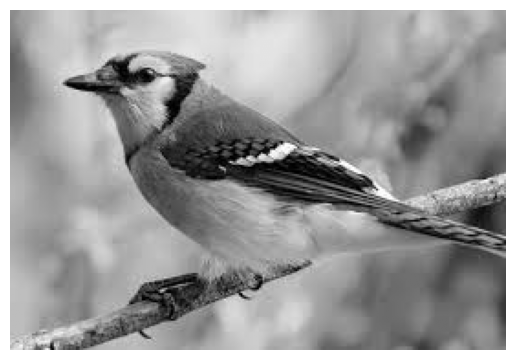

Predicted image: 82
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


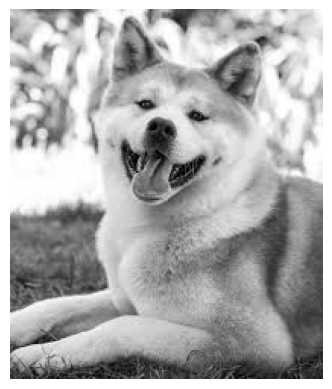

Predicted image: 75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


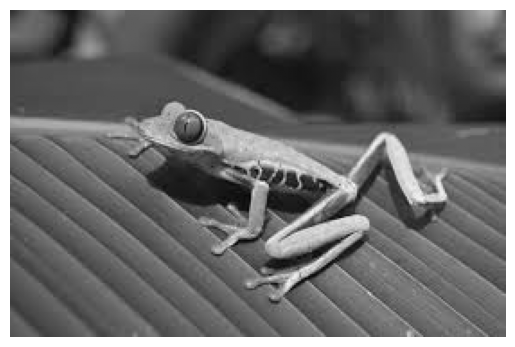

Predicted image: 82
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


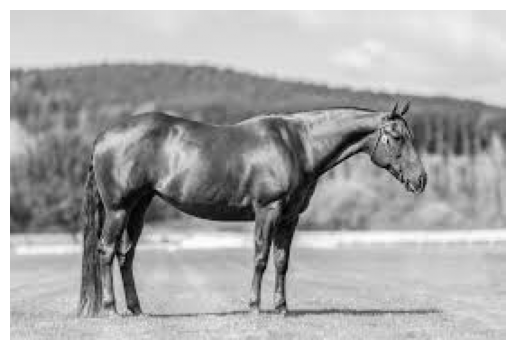

Predicted image: 82
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


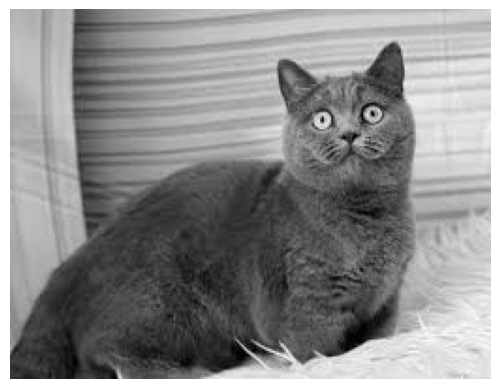

Predicted image: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


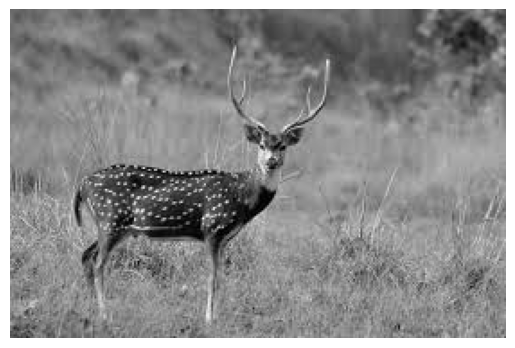

Predicted image: 82
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


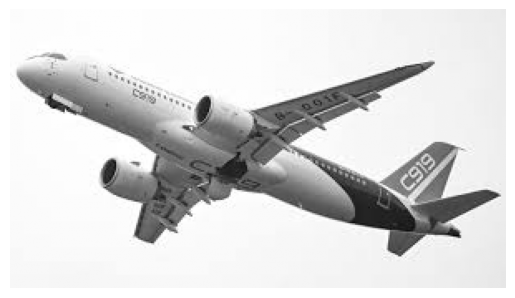

Predicted image: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


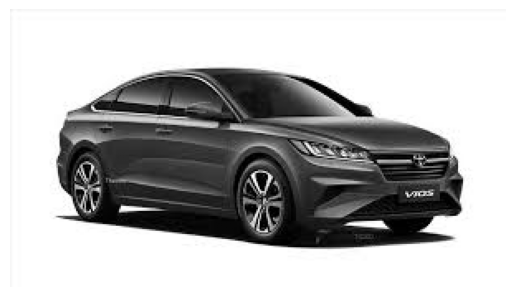

Predicted image: 54
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


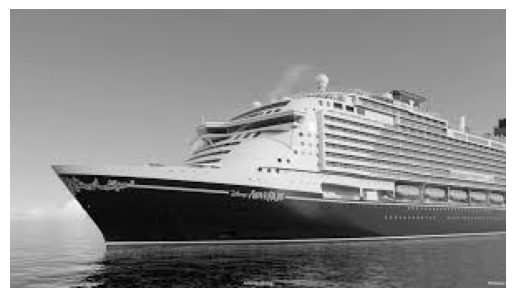

Predicted image: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


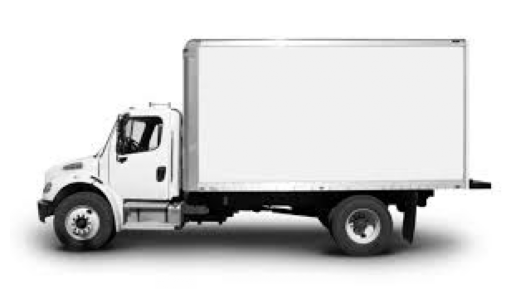

Predicted image: 7


In [22]:
image_path=["/content/chim.jfif","/content/chof.jfif","/content/ech.jfif","/content/horse.jfif","/content/meos.jfif","/content/huou.jfif","/content/b1.jfif","/content/oto.jfif","/content/taun.jfif","/content/taii.jfif"]
for path in image_path:
    predicted_image = predict_image(path)
    print(f"Predicted image: {predicted_image}")